Reference [kaggle](https://www.kaggle.com/oakmin/audio-data-exploration)

workbook contains plots that may be useful to analyse audio data

In [1]:
%%capture
%pip install numpy==1.21* scipy pandas matplotlib sklearn librosa seaborn speechbrain

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import os
import librosa
import librosa.display
import seaborn as sns



In [3]:
DIR="/Users/neelanpather/dev/amr2wav/1/converted/" 


In [4]:
from scipy.io.wavfile import read as read_wav

for f in os.listdir(DIR):
    sampling_rate, data=read_wav(os.path.join(DIR,f))
    if sampling_rate!=16000:
        print(f"ERROR on {f}")
    print(sampling_rate)

16000
16000
16000
16000
16000
16000
16000
16000
16000
16000


In [19]:
y, sr = librosa.load(os.path.join(DIR,"3.wav"))
ipd.Audio(y, rate=sr)

* In music "chroma" feature relates to 12 different pitch classes
* Chroma-based featurescan be used to categorize music with meaningful pitches (usually into 12 scales) and whose tuning can equated to the equal-tempered scale.

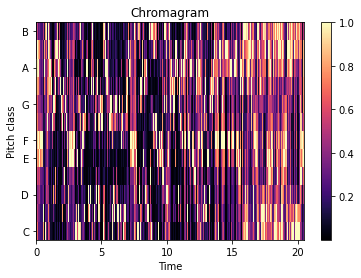

In [7]:
S = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')
plt.show()

* spectral centroid characterises audio spectrum by finding its center of mass

* connected to brightness of sound, referring to higher mid & treble parts of frequency.



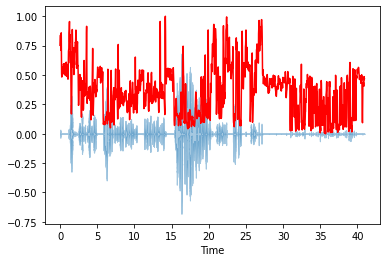

In [8]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(y_, axis=0):
    return sklearn.preprocessing.minmax_scale(y_, axis=axis)
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes
plt.show()

* Spectral Bandwidth similar to above, just with a weighted p to provide different measures of spectral analysis

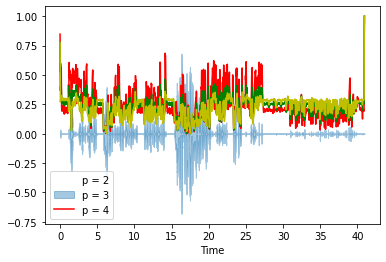

In [9]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=4)[0]
librosa.display.waveshow(y=y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))
plt.show()

https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225

# Testing speechbrain models without any pre-training

In [11]:
%%capture
%pip install speechbrain
import speechbrain 

In [12]:
%%capture
%pip install ipywidgets

In [17]:
from speechbrain.pretrained import EncoderDecoderASR
asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="./pretrained_ASR")

In [18]:
asr_model.transcribe_file(os.path.join(DIR,"3.wav"))

"BELLOT HELLO HE ASKED GOOD MORNING HOW ARE YOU FOOL LOOKING POPE AND IF YOU'RE GOING TO STAY UP WITH US YOU'LL HAVE TO SEND DAMP AND LOOK AT ONE'S LOST MUDDY POND I'LL CALL YOU I'M AFRAID HE'S ABSOLUTELY BENEATH THE SMITH'S THORN"